<a href="https://colab.research.google.com/github/prayas99/Image_Object_Detection_OpenCV/blob/main/Image_Object_Detection_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and getting Videos

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd
from math import sqrt,pi
import math
import plotly.express as px 
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 720,
    'width': 1080,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Input Video

# Enter path of video

In [ ]:
input_video_path  = 'path_to_video/04.mp4'

True
(720, 1280, 3)


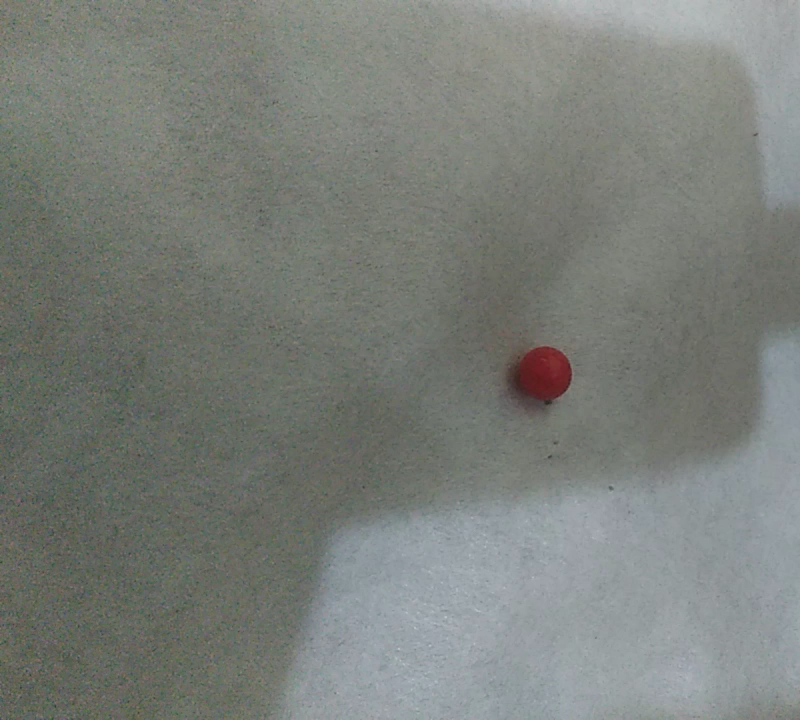

In [ ]:

input_video = cv2.VideoCapture(input_video_path)
ret, frame = input_video.read()
print(ret)
print(np.shape(frame))

# Cropping frames
top = 0
bottom = 720
left = 0
right = 800

frame = frame[top:bottom, left:right, :]

cv2_imshow(frame)

# Processing

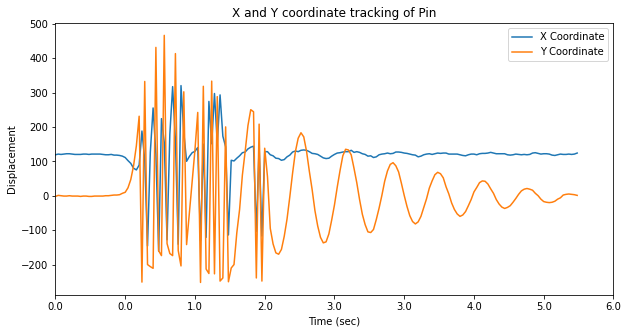

In [ ]:
area_list=[]
timer_now = []
centroid_x1 = []
centroid_y1 = []
input_video = cv2.VideoCapture(input_video_path)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('01_processed.avi', fourcc, 30, ( bottom-top,right-left))
while True:
    ret, frame = input_video.read()
    if not ret:
        break
    frame = frame[top:bottom, left:right, :]
    frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #Creating while frame 
    frame_final = np.zeros(frame.shape, np.uint8)+255
     # color space 
    imageFrame = frame.copy()
    hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)   
    # Set range for red color and  
    # define mask (red pin)
    red_lower = np.array([155,25,0])
    red_upper = np.array([179,255,255])
    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper) 
    kernal = np.ones((5, 5), "uint8") 
      
    # For red color 
    red_mask = cv2.dilate(red_mask, kernal) 
    res_red = cv2.bitwise_and(imageFrame, imageFrame,  
                              mask = red_mask) 
    #cv2_imshow(red_mask) 
   
    # Creating contour to track red color 
    contours, hierarchy = cv2.findContours(red_mask, 
                                           cv2.RETR_TREE, 
                                           cv2.CHAIN_APPROX_SIMPLE) 
      
    for pic, contour in enumerate(contours): 
        
        area = cv2.contourArea(contour) 

        area_list.append(area)
        M = cv2.moments(contour)

      # calculate x,y coordinate of center
        if (M["m00"])!=0:
          cX = int(M["m10"] / M["m00"])
          cY = int(M["m01"] / M["m00"])
          x1,y1 = cX,cY
          # Threshold of area of contours as 2000
          if(area > 1000): 
              
              cv2.line(frame_final,(x1-5, y1),(x1+5, y1),(0, 0, 255),2)
              cv2.line(frame_final,(x1, y1-5),(x1, y1+5),(0, 0, 255),2)

              centroid_x1.append(cX)
              centroid_y1.append(cY)    
              timer_now.append(input_video.get(cv2.CAP_PROP_POS_MSEC))
              x, y, w, h = cv2.boundingRect(contour)   
              cv2.putText(frame_final, "Pin", (x, y), 
                          cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
                          (0, 0, 255),lineType=2)     
              # Getting original time of video
    
    output_movie.write(frame_final) 
    #cv2_imshow(frame_final) 
    #break      

output_movie.release()
plt.figure(figsize=(10,5))
plt.plot(centroid_x1-np.mean(centroid_y1), label="X Coordinate")
plt.plot(centroid_y1-np.mean(centroid_y1), label="Y Coordinate")
labels, locations = plt.xticks()
plt.xticks(labels, (labels/max(labels)*(max(timer_now)//1000))//1)
plt.xlim(0,)
plt.legend()
plt.title("X and Y coordinate tracking of Pin")
plt.xlabel("Time (sec)")
plt.ylabel("Displacement")
plt.savefig("Case4.jpg",dpi=600)
plt.show()

In [ ]:
print('Video Length (sec) :',max(timer_now)/1000)
df1 = pd.DataFrame()
df1['timestamp'] = timer_now
df1['timestamp'] = df1['timestamp']/1000
df1['centroid_y1'] = centroid_y1
df1['centroid_y1']  = (df1['centroid_y1'] - df1['centroid_y1'].mean())/100
df1 = df1.round(3)
df1.head()

Video Length (sec) : 6.0586777777777785


,timestamp,centroid_y1
0,0.000,-0.018
1,0.033,0.012
2,0.067,0.002
3,0.100,-0.008
4,0.133,-0.008


In [ ]:
fig = px.line(df1, x=df1["timestamp"], y=df1["centroid_y1"])
fig.update_layout(title="Y coordinate of Pin Vs time",
    xaxis_title="time",
    yaxis_title="displacement",)
fig.show(config=config)

In [ ]:
df2 = df1[df1['timestamp']>=2.63]
df2 = df2[df2['timestamp']<=5.892]
df2 = df2.reset_index(drop=True)
df2

,timestamp,centroid_y1
0,2.630,-0.028
1,2.663,0.662
2,2.696,1.282
3,2.730,1.672
4,2.763,1.832
...,...,...
94,5.759,-0.188
95,5.792,-0.158
96,5.826,-0.098
97,5.859,-0.058


In [ ]:
print('Sampling Frequency :',len(df2)/(df2['timestamp'].max()-df2['timestamp'].min()))

Sampling Frequency : 30.34947884733292


In [ ]:
df2.to_csv("Case4.csv",index=False)